# Project: Investigating and Analysis of tmdb movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section, I will be analysing tmdb-movies dataset to bring out insights on different factors like movie that generated the highest revenue in the entire dataset, high selling genres and lots more.
>
QUESTIONS POSED
> 1. what are the most popular genres?
> 2. top 10 most popular movies
> 3. top movies based on the returns generated
> 4. low or zero income movies in the dataset (movies that performed poorly in the market)
> 5. check for relationships between the following:
    * vote_average and popularity
    * runtime and income_generated
    * budget and income generated
    * vote_count and popularity
    * popularity and income_generated

In [2]:
#importing the necessary packages to be used for the analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#reading in my movies dataset into the notebook
df=pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

The cell above gives us a glimpse of our dataset. in the cells below we will be checking the columns of the dataset and their datatypes. we will also be trimming our data by removing columns we feel it's not so relevant for our posed questions. Also, the genre coulmn doesn't look like something we can work with and bring much insights so we'll be trimming it to only the first two genres specified as seen above, and we'd take those 2 to be our `major_genres`

In [4]:
#checking each column and its datatype to see if it corresponds with its content
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# checking for the number of rows in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#dropping columns that doesn't seem to be too useful for the analysis of questions posed 
# and then check to see if changes are permanent
irrelevant_columns=['imdb_id','id', 'homepage','production_companies', 'tagline','keywords', 'overview','cast','director']
df.drop(irrelevant_columns, axis = 1, inplace= True)


In [7]:
df.head(1)

popularity     budget     revenue  original_title  runtime  \
0   32.985763  150000000  1513528810  Jurassic World      124   

                                      genres release_date  vote_count  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15        5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09

In [8]:
#converting the datatype of 'release_date' from an object to a datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
#convert the revenue and budget from int to float
cash = ['revenue', 'budget']
for c in cash: 
    df[c]=df[c].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   budget          10866 non-null  float64       
 2   revenue         10866 non-null  float64       
 3   original_title  10866 non-null  object        
 4   runtime         10866 non-null  int64         
 5   genres          10843 non-null  object        
 6   release_date    10866 non-null  datetime64[ns]
 7   vote_count      10866 non-null  int64         
 8   vote_average    10866 non-null  float64       
 9   release_year    10866 non-null  int64         
 10  budget_adj      10866 non-null  float64       
 11  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1018.8+ KB


In [11]:
#there are some null labels in the genres column so for the sake of equal counts in each column labels,
# we will drop all rows with an unspecified genre
df.dropna(inplace=True)
#the code below is to check if there is any null value in the entire dataset
df.isna().sum().any()

False

In [12]:
#check the dataset for any duplicates
sum(df.duplicated())

1

In [13]:
#removing duplicates from the dataset
df.drop_duplicates(inplace = True)

Now that we're done cleaning our data, we're going to work on our genres column as we talked about earlier


In [14]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

As we can see in the output of the code above, the genre column contains more than one genre title so for the sake of clarity and easier manipulation of data, we will be trimming this column to just the first two.

In [15]:
# splitting the genre column into it's first two major genres that are specified and inserting it into a variable 'new_genres'
new_genres=df.genres.str.split('|', expand = True).iloc[:,0:2]
new_genres.columns=['gen_01','gen_02']
new_genres['gen_02'].fillna(new_genres.gen_01, inplace= True)
new_genres 

gen_01           gen_02
0           Action        Adventure
1           Action        Adventure
2        Adventure  Science Fiction
3           Action        Adventure
4           Action            Crime
...            ...              ...
10861  Documentary      Documentary
10862       Action        Adventure
10863      Mystery           Comedy
10864       Action           Comedy
10865       Horror           Horror

[10842 rows x 2 columns]

In [16]:
# concatenating the two columns created (gen_01 and gen_02) as one and adding a comma as a seperator for easy readability
new_genres = new_genres.gen_01 + ', ' + new_genres.gen_02


In [17]:
new_genres

0                 Action, Adventure
1                 Action, Adventure
2        Adventure, Science Fiction
3                 Action, Adventure
4                     Action, Crime
                    ...            
10861      Documentary, Documentary
10862             Action, Adventure
10863               Mystery, Comedy
10864                Action, Comedy
10865                Horror, Horror
Length: 10842, dtype: object

In [18]:
# adding the new genre column that was created and dropping the initial one
df['major_genres'] = new_genres
df.drop('genres', axis=1, inplace = True)

In [19]:
# check to see if our changes are in place
df.tail()

popularity   budget  revenue            original_title  runtime  \
10861    0.080598      0.0      0.0        The Endless Summer       95   
10862    0.065543      0.0      0.0                Grand Prix      176   
10863    0.065141      0.0      0.0       Beregis Avtomobilya       94   
10864    0.064317      0.0      0.0    What's Up, Tiger Lily?       80   
10865    0.035919  19000.0      0.0  Manos: The Hands of Fate       74   

      release_date  vote_count  vote_average  release_year     budget_adj  \
10861   2066-06-15          11           7.4          1966       0.000000   
10862   2066-12-21          20           5.7          1966       0.000000   
10863   2066-01-01          11           6.5          1966       0.000000   
10864   2066-11-02          22           5.4          1966       0.000000   
10865   2066-11-15          15           1.5          1966  127642.279154   

       revenue_adj              major_genres  
10861          0.0  Documentary, Documentary  
10862          0.0         Action, Adventure  
10863          0.0           Mystery, Comedy  
10864          0.0            Action, Comedy  
10865          0.0            Horror, Horror

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what are the most popular genres)

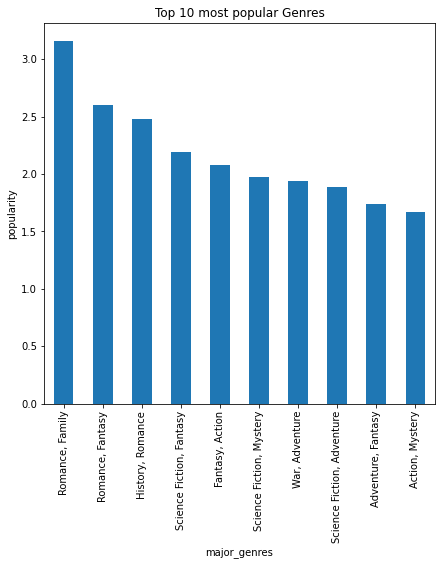

In [29]:
# what are the top 10 most popular genres?
most_popular_genre = df.groupby(['major_genres'])['popularity'].mean().nlargest(10)
most_popular_genre.plot(kind='bar', title='Top 10 most popular Genres',ylabel= 'popularity', figsize=(7,7));


The output above shows us the 10 most popular genres in our dataset with **Romance,Family** being the most popular genre of them all


### Research Question 2  (Top 10 popular movies)

In [21]:
# what are the top 10 most popular movies
most_popular_movies = df.nlargest(10, 'popularity')
most_popular_movies


popularity       budget       revenue  \
0      32.985763  150000000.0  1.513529e+09   
1      28.419936  150000000.0  3.784364e+08   
629    24.949134  165000000.0  6.217525e+08   
630    14.311205  170000000.0  7.733124e+08   
2      13.112507  110000000.0  2.952382e+08   
631    12.971027  170000000.0  7.147666e+08   
1329   12.037933   11000000.0  7.753980e+08   
632    11.422751   20000000.0  7.873990e+07   
3      11.173104  200000000.0  2.068178e+09   
633    10.739009  125000000.0  7.521002e+08   

                             original_title  runtime release_date  vote_count  \
0                            Jurassic World      124   2015-06-09        5562   
1                        Mad Max: Fury Road      120   2015-05-13        6185   
629                            Interstellar      169   2014-11-05        6498   
630                 Guardians of the Galaxy      121   2014-07-30        5612   
2                                 Insurgent      119   2015-03-18        2480   
631     Captain America: The Winter Soldier      136   2014-03-20        3848   
1329                              Star Wars      121   1977-03-20        4428   
632                               John Wick      101   2014-10-22        2712   
3              Star Wars: The Force Awakens      136   2015-12-15        5292   
633   The Hunger Games: Mockingjay - Part 1      123   2014-11-18        3590   

      vote_average  release_year    budget_adj   revenue_adj  \
0              6.5          2015  1.379999e+08  1.392446e+09   
1              7.1          2015  1.379999e+08  3.481613e+08   
629            8.0          2014  1.519800e+08  5.726906e+08   
630            7.9          2014  1.565855e+08  7.122911e+08   
2              6.3          2015  1.012000e+08  2.716190e+08   
631            7.6          2014  1.565855e+08  6.583651e+08   
1329           7.9          1977  3.957559e+07  2.789712e+09   
632            7.0          2014  1.842182e+07  7.252661e+07   
3              7.5          2015  1.839999e+08  1.902723e+09   
633            6.6          2014  1.151364e+08  6.927528e+08   

                    major_genres  
0              Action, Adventure  
1              Action, Adventure  
629             Adventure, Drama  
630      Action, Science Fiction  
2     Adventure, Science Fiction  
631            Action, Adventure  
1329           Adventure, Action  
632             Action, Thriller  
3              Action, Adventure  
633   Science Fiction, Adventure

The output above shows us that **Jurrasic World** is the most popular movie in our entire dataset with a popularity score of 32.9 followed by **Mad Max: Fury Road** with a popularity score of 28.4

### Research Question 3 (Top Movies Based On Return Profits)

In [22]:
#for the total revenue returns a movie generated we have to subtract the budget from the revenue 
# and then use it to create a new column in our dataset
df['income_generated'] =df.revenue - df.budget
df.head()

popularity       budget       revenue                original_title  \
0   32.985763  150000000.0  1.513529e+09                Jurassic World   
1   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08                     Insurgent   
3   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4    9.335014  190000000.0  1.506249e+09                     Furious 7   

   runtime release_date  vote_count  vote_average  release_year    budget_adj  \
0      124   2015-06-09        5562           6.5          2015  1.379999e+08   
1      120   2015-05-13        6185           7.1          2015  1.379999e+08   
2      119   2015-03-18        2480           6.3          2015  1.012000e+08   
3      136   2015-12-15        5292           7.5          2015  1.839999e+08   
4      137   2015-04-01        2947           7.3          2015  1.747999e+08   

    revenue_adj                major_genres  income_generated  
0  1.392446e+09           Action, Adventure      1.363529e+09  
1  3.481613e+08           Action, Adventure      2.284364e+08  
2  2.716190e+08  Adventure, Science Fiction      1.852382e+08  
3  1.902723e+09           Action, Adventure      1.868178e+09  
4  1.385749e+09               Action, Crime      1.316249e+09

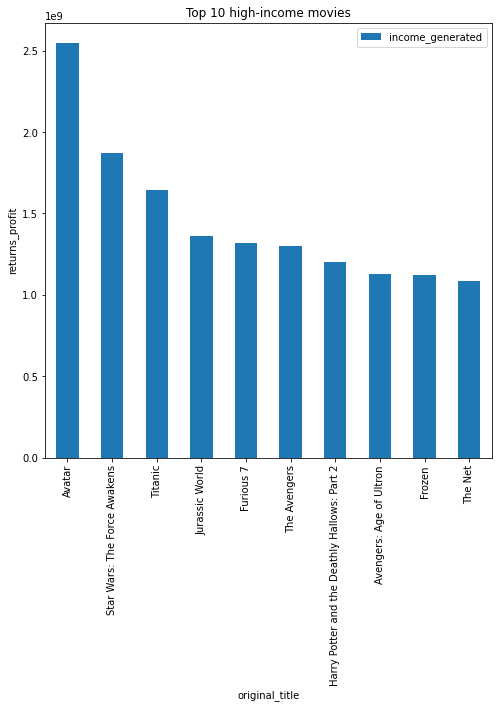

In [23]:
# movies with the highest income generated
high_earning_movies = df.nlargest(10, 'income_generated')
Title= 'Top 10 high-income movies'
high_earning_movies.plot(x ='original_title', y ='income_generated',title=Title, kind='bar', figsize=(8,8), ylabel='returns_profit');

The top three movies with the highest returns are **Avatar, Star Wars: The Force Awakens, and Titanic** respectively

### Research Question 4 ( Movies with a low revenue returns / Bottom feeders )

In [24]:
# least performing movies based on profits?
low_performing_movies = df.nsmallest(5, 'income_generated')
low_performing_movies

popularity       budget     revenue     original_title  runtime  \
2244    0.250540  425000000.0  11087569.0  The Warrior's Way      100   
5508    1.214510  255000000.0  89289910.0    The Lone Ranger      149   
2069    0.642475  150000000.0         0.0        The Wolfman      102   
2214    0.757082  120000000.0         0.0        The Pacific      540   
7031    0.948560  145000000.0  25819961.0          The Alamo      137   

     release_date  vote_count  vote_average  release_year    budget_adj  \
2244   2010-12-02          74           6.4          2010  4.250000e+08   
5508   2013-07-03        1607           6.0          2013  2.386885e+08   
2069   2010-02-11         299           5.4          2010  1.500000e+08   
2214   2010-05-16         183           7.8          2010  1.200000e+08   
7031   2004-04-07          60           5.9          2004  1.673946e+08   

       revenue_adj        major_genres  income_generated  
2244  1.108757e+07  Adventure, Fantasy      -413912431.0  
5508  8.357833e+07   Action, Adventure      -165710090.0  
2069  0.000000e+00    Horror, Thriller      -150000000.0  
2214  0.000000e+00          War, Drama      -120000000.0  
7031  2.980774e+07    Western, History      -119180039.0

As seen above,these are the five movies that performed poorly in the movie market. for each of these movie, the budget exceeds the return profits which gives a negative trend

### Research Question 5 (Bonus Questions: checking for relationships within columns)
   

In [25]:
# we define a function that helps us to display a scatter plot for different columns we want to compare so as to avoid repitition
def plot_chart(x, y, type="scatter"):
     df.plot(x=x, y=y, kind=type, figsize=(7,6), title=('Relationship Between '+ x + ' and '+y))

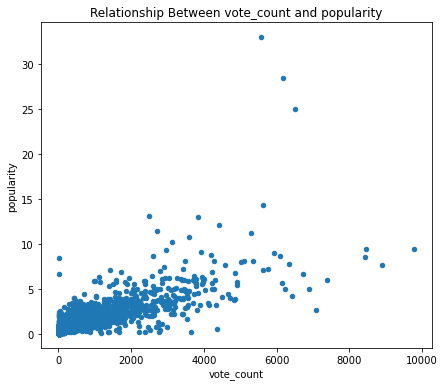

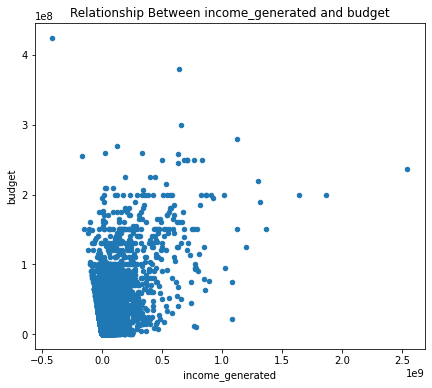

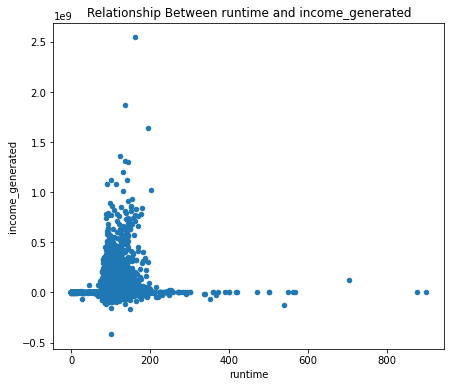

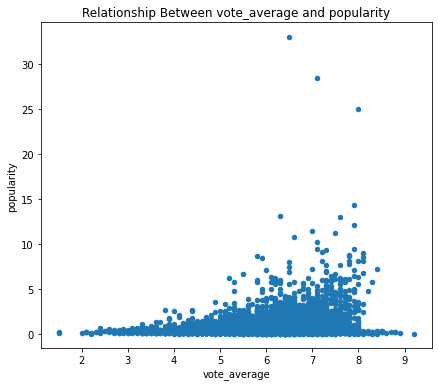

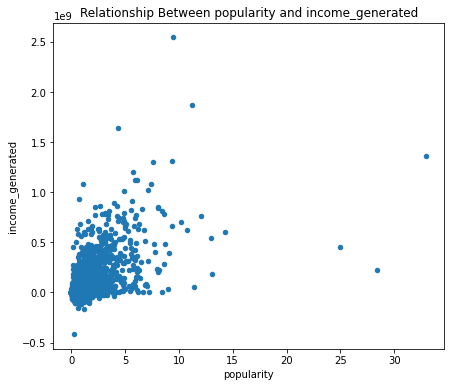

In [26]:
plot_chart('vote_count', 'popularity')
plot_chart('income_generated', 'budget')
plot_chart('runtime', 'income_generated')
plot_chart('vote_average', 'popularity')
plot_chart('popularity', 'income_generated')

The scatter plot shown above tells us that there's a slight positive correlation between `vote_counts` and the `popularity` of a movie, and a linear correlation between `vote_average` and `popularity`. While the rest of our compared columns seem to have no correlation at all.

In [30]:
# saving our edited data
df.to_csv('movie_data_analysis', index = False)

<a id='conclusions'></a>
## Conclusions
Upon exploration of our given movie data, we noticed that although making a movie that gets fame and popularity overtime can be of  great achievement and importance for the movie franchise and its owners, this doesn't also guarantee that there'll be an increase in returns profit as regards to its fame. As seen in our exploratory data analysis step, only one out of the top 5 most popular movies was able to make its way to the chart of the top 5 high-income movies. The same can be said for high-income movies too, as the richest movie in the dataset didn't fall under the top 10 most popular movies.
As a movie producer, sometimes you may want to consider which genre should your movie centre around based on the most watched genres over the years. Our analysis shows that the most watched genres (top 3 in precise) had romance in them, if not as a main genre then as a sub-genre. One can take this into consideration if the aim of your movie is to satisfy the audience.
Lastly, by merely looking at this dataset and its columns, one can be curious about if a relationship exists between two specific columns. like, for instance, the vote_average and the income_generated. One would expect that a movie with a high vote_average should generate a huge profit, but this is not the case as seen in the movie **The Pacific**, which has an average_vote of 7.8 and the budget exceeds its revenue(this is seen in our top 5 bottom feeders research question). We also ensured to check for any relationship between columns that we suspected to have some sort of correlation just for more clarification.


### LIMITATIONS
 > In the given dataset there were some empty rows in the genre columns and due to this we had to drop the affected rows and in   that process losing some of our  data.


**references** https://datascienceparichay.com/article/pandas-split-column-by-delimiter/#:~:text=Split%20column%20by%20delimiter%20into,True%20to%20the%20expand%20parameter.